## Try 7.4.1: Multiple linear regression in Python.

**The code below fits three multiple linear regression model objects using the cars data. The first model has two input features, the second model is a simple polynomial regression on one feature, and the third is a polynomial regression on two features. Predictions are made using the models that will vary slightly from the predictions calculated by hand in the section due to the code using many more decimal places throughout.**

* **Click the double-right arrow to restart the kernel and run all cells.**
* **Examine the code below.**
* **Understand the use of the methods fit, predict, intercept_, and coef_ for LinearModel().**
* **Understand the use of the fit_transform method of PolynomialFeatures() to create an array of powers and interaction terms of the features to fit a polynomial model.**

In [1]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from mpl_toolkits import mplot3d

In [2]:
# Load the dataset
mpg = pd.read_csv('mpg.csv')

# Remove rows that have missing fields
mpg = mpg.dropna()

mpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [ ]:
# Store relevant columns as variables
X = mpg[['acceleration', 'weight']].values.reshape(-1, 2)
y = mpg[['mpg']].values.reshape(-1, 1)

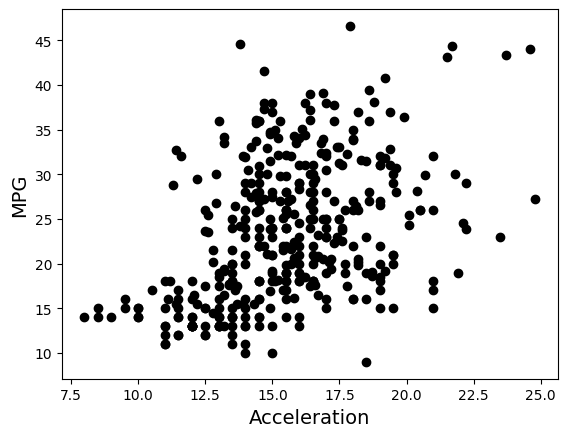

In [3]:
# Graph acceleration vs MPG
plt.scatter(X[:, 0], y, color='black')
plt.xlabel('Acceleration', fontsize=14);
plt.ylabel('MPG', fontsize=14);

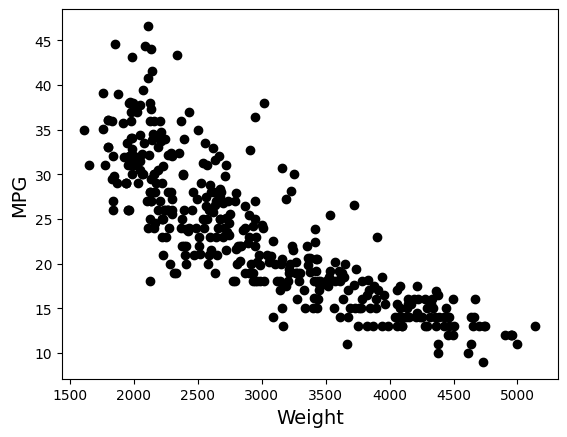

In [4]:
# Graph weight vs MPG
plt.scatter(X[:, 1], y, color='black')
plt.xlabel('Weight', fontsize=14);
plt.ylabel('MPG', fontsize=14);

In [5]:
# Fit a least squares multiple linear regression model
linModel = LinearRegression()
linModel.fit(X, y)

# Write the least squares model as an equation
print(
    "Predicted MPG = ",
    linModel.intercept_[0],
    " + ",
    linModel.coef_[0][0],
    "* (Acceleration)",
    " + ",
    linModel.coef_[0][1],
    "* (Weight)",
)

Predicted MPG =  41.095328779604245  +  0.26165039648878763 * (Acceleration)  +  -0.0072930951138257165 * (Weight)


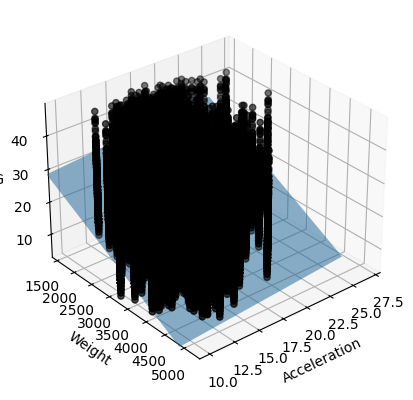

In [10]:
# Set up the figure
fig = plt.figure()
ax = plt.axes(projection='3d')
# Plot the points
ax.scatter3D(X[:, 0], X[:, 1], y, color="Black")
# Plot the regression as a plane
xDeltaAccel, xDeltaWeight = np.meshgrid(
    np.linspace(X[:, 0].min(), X[:, 0].max(), 2),
    np.linspace(X[:, 1].min(), X[:, 1].max(), 2),
)
yDeltaMPG = (
    linModel.intercept_[0]
    + linModel.coef_[0][0] * xDeltaAccel
    + linModel.coef_[0][1] * xDeltaWeight
)
ax.plot_surface(xDeltaAccel, xDeltaWeight, yDeltaMPG, alpha=0.5)
# Axes labels
ax.set_xlabel('Acceleration');
ax.set_ylabel('Weight');
ax.set_zlabel('MPG');
# Set the view angle
ax.view_init(30, 50);
ax.set_xlim(28, 9);
plt.show()

In [13]:
# Make a prediction
yMultyPredicted = linModel.predict([[20, 3000]])
print(
    "Predicted MPG for a car with acceleration = 20 seconds and Weight = 3000 pounds \n",
    "using the multiple linear regression is ",
    yMultyPredicted[0][0],
    "miles per gallon",
)

Predicted MPG for a car with acceleration = 20 seconds and Weight = 3000 pounds 
 using the multiple linear regression is  24.449051367902843 miles per gallon


Predicted MPG =  62.255473973292126  +  -0.018495610572078977 * (Weight)  +  1.6965650653725306e-06 * (Weight)^2


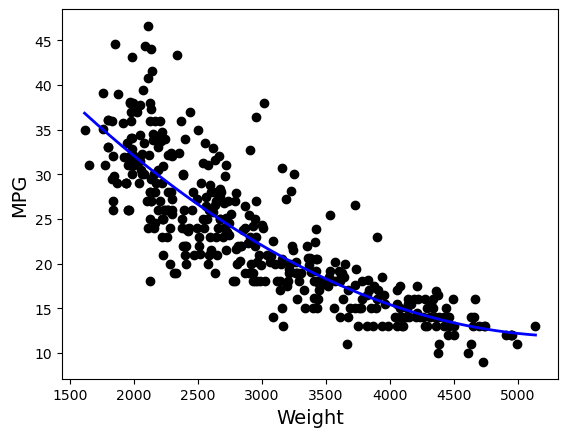

In [15]:
# Store weight as an array
X2 = X[:, 1].reshape(-1, 1)

# Fit a quadratic regression model using just Weight
polyFeatures = PolynomialFeatures(degree=2, include_bias=False)
xPoly = polyFeatures.fit_transform(X2)
polyModel = LinearRegression()
polyModel.fit(xPoly, y)

# Graph the quadratic regression
plt.scatter(X2, y, color='black')
xDelta = np.linspace(X2.min(), X2.max(), 1000)
yDelta = polyModel.predict(polyFeatures.fit_transform(xDelta.reshape(-1, 1)))
plt.plot(xDelta, yDelta, color='blue', linewidth=2)
plt.xlabel('Weight', fontsize=14)
plt.ylabel('MPG', fontsize=14)

# Write the quadratic model as an equation
print(
    "Predicted MPG = ",
    polyModel.intercept_[0],
    " + ",
    polyModel.coef_[0][0],
    "* (Weight)",
    " + ",
    polyModel.coef_[0][1],
    "* (Weight)^2",
)

In [17]:
# Make a prediction
polyInputs = polyFeatures.fit_transform([[3000]])
yPolyPredicted = polyModel.predict(polyInputs)
print(
    "Predicted MPG for a car with Weight = 3000 pounds \n",
    "using the simple polynomial regression is ", yPolyPredicted[0][0], "miles per gallon",
)

Predicted MPG for a car with Weight = 3000 pounds 
 using the simple polynomial regression is  22.03772784540797 miles per gallon


In [19]:
# Fit a quadratic regression model using acceleration and weight
polyFeatures2 = PolynomialFeatures(degree=2, include_bias=False)
xPoly2 = polyFeatures.fit_transform(X)
polyModel2 = LinearRegression()
polyModel2.fit(xPoly2, y)

# Write the quadratic regression as an equation
print(
    "Predicted MPG =", polyModel2.intercept_[0], "\n",
    " + ", polyModel2.coef_[0][0], "* (Acceleration)\n",
    " + ", polyModel2.coef_[0][1], "* (Weight)", "\n",
    " + ", polyModel2.coef_[0][2], "* (Acceleration)^2 \n",
    " + ", polyModel2.coef_[0][3], "* (Acceleration)*(Weight) \n",
    " + ", polyModel2.coef_[0][4], "* (Weight)^2 \n",
)

Predicted MPG = 78.31768655349971 
  +  -1.62826431362527 * (Acceleration)
  +  -0.02263464264889955 * (Weight) 
  +  0.045613892468732854 * (Acceleration)^2 
  +  0.0001554496268095789 * (Acceleration)*(Weight) 
  +  2.0264199567090375e-06 * (Weight)^2 



In [11]:
# Make a prediction
polyInputs2 = polyFeatures2.fit_transform([[20, 3000]])
yPolyPredicted2 = polyModel2.predict(polyInputs2)
print(
    "Predicted MPG for a car with acceleration = 20 seconds and Weight = 3000 pounds \n",
    "using the polynomial regression is ", yPolyPredicted2[0][0], "miles per gallon",
)

Predicted MPG for a car with acceleration = 20 seconds and Weight = 3000 pounds 
 using the polynomial regression is  23.65878654074416 miles per gallon


## challenge activity 7.4.2: Multiple linear regression using scikit-learn.

**1)**
**John F. Kennedy International Airport (JFK) is a major airport serving New York City. JFK wanted to predict the arrival delay of an incoming flight based on the departure delay. 50 recent flights were randomly selected, and the arrival delays (in minutes) were recorded.**

* **Initialize a multiple regression model for predicting arrival delay based on departure delay and flight distance.**
    
**The code contains all imports, loads the dataset, fits the regression model, and prints the model's intercept.**

In [ ]:
# Import packages and functions
import pandas as pd
from sklearn.linear_model import LinearRegression

# Import flights and remove missing values
flights = pd.read_csv('flightsJFK.csv').dropna()

# Define X and y and convert to proper format
X = flights[['dep_delay', 'distance']].values.reshape(-1, 2)
y = flights[['arr_delay']].values.reshape(-1, 1)

# Initialize a linear regression model
multipleModel = # Your code goes here

# Fit the linear model
multipleModel = multipleModel.fit(X, y)

print('Intercept:', multipleModel.intercept_)

**2)**
**John F. Kennedy International Airport (JFK) is a major airport serving New York City. JFK wanted to predict the arrival delay of an incoming flight based on the departure delay. 50 recent flights were randomly selected, and the arrival delays (in minutes) were recorded.**

* **Create a dataframe containing month (month) and departure delay (dep_delay) in that order. Use the reshape() function to ensure the input features are in the proper format.**

**The code contains all imports, loads the dataset, fits the regression model, and prints the model's intercept.**

In [ ]:
# Import packages and functions
import pandas as pd
from sklearn.linear_model import LinearRegression

# Import flights and remove missing values
flights = pd.read_csv('flightsJFK.csv').dropna()

# Define X and y and convert to proper format
X = # Your code goes here
y = flights[['arr_delay']].values.reshape(-1, 1)

# Initialize a linear regression model
multipleModel = LinearRegression()

# Fit the linear model
multipleModel = multipleModel.fit(X, y)

print('Intercept:', multipleModel.intercept_)

**3)**
**LaGuardia Airport (LGA) is a major airport serving New York City. LGA wanted to predict the arrival delay of an incoming flight based on the departure delay. 50 recent flights were randomly selected, and the arrival delays (in minutes) were recorded.**

* **Predict the arrival delay for a flight with departure delay of 36 and air travel time of 73, and assign variable yHat with the prediction.**
* **Calculate the slope coefficients for multipleModel and assign slope with the result.**
  
**The code contains all imports, loads the dataset, fits the multiple regression model, and prints yHat and slope once calculated.**

In [ ]:
# Import packages and functions
import pandas as pd
from sklearn.linear_model import LinearRegression

# Import flights and remove missing values
flights = pd.read_csv('flightsLGA.csv').dropna()

# Define X and y and convert to proper format
X = flights[['dep_delay', 'air_time']].values.reshape(-1, 2)
y = flights[['arr_delay']].values.reshape(-1, 1)

# Initialize a linear regression model
multipleModel = LinearRegression()

# Fit the linear model
multipleModel = multipleModel.fit(X, y)

# Predict the arrival delay and save the slope coefficient
# Your code goes here
yHat = 
slope = 

print('Predicted arrival delay:', yHat)
print('Slope coefficients:', slope)